In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from MAT2 import *

Welcome to MAT2!


### Load logcounts data

In [32]:
data = pd.read_csv('thymus_mouse_logcounts_corrected.csv', header=0, index_col=0)
data

,cell 1,cell 2,cell 3,cell 4,cell 5,cell 6,cell 7,cell 8,cell 9,cell 10,...,cell 83868,cell 83869,cell 83870,cell 83871,cell 83872,cell 83873,cell 83874,cell 83875,cell 83876,cell 83877
Xkr4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Mrpl15,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.484266,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Lypla1,0.0,1.020652,0.000000,0.0,0.0,0.0,0.000000,2.266003,0.0,0.000000,...,0.0,0.0,0.925648,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Tcea1,0.0,0.000000,0.909317,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sfxn4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Prdx3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.484266,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Grk5,0.0,0.000000,4.773187,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Gm7102,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.91094,0.0,0.0,0.0,0.0,0.0,0.0


### Load metadata

In [36]:
metadata = pd.read_csv('thymus_mouse_metadata_corrected_colnames.csv', header=0, index_col=0)
metadata

,batch,type
cell 1,Dhalla_2020,NaN
cell 2,Dhalla_2020,NaN
cell 3,Dhalla_2020,NaN
cell 4,Dhalla_2020,NaN
cell 5,Dhalla_2020,NaN
...,...,...
cell 83873,Bornstein_2018,NaN
cell 83874,Bornstein_2018,NaN
cell 83875,Bornstein_2018,NaN
cell 83876,Bornstein_2018,NaN


### Load anchors

In [34]:
anchor = pd.read_csv('mouse_thymus_anchors_corrected_colnames.csv', header=0, index_col=0)
anchor

,cell1,cell2,score
1,2,11041,0.250000
2,2,11526,0.500000
3,4,11778,0.450000
4,7,9597,0.000000
5,11,9401,0.700000
...,...,...,...
35094,71494,49487,0.563356
35095,53203,49493,0.820205
35096,70067,49497,0.948630
35097,53844,49497,0.777397


### tSNE function

In [23]:
def plot_tsne(tsne):
    _, axes = plt.subplots(1, 2, figsize=(20, 10))
    classes, uni_class = pd.factorize(metadata['type'])
    cmap1 = matplotlib.cm.rainbow(np.linspace(0, 1, len(uni_class)))
    for i, class_i in enumerate(uni_class):
        cell_list = np.where(classes == i)
        axes[0].scatter(tsne[cell_list, 0], tsne[cell_list, 1], 
                        label=class_i, color=cmap1[i,:], s=5)
    batches, uni_batch = pd.factorize(metadata['batch'])
    cmap2 = matplotlib.cm.rainbow(np.linspace(0, 1, len(uni_batch)))
    for i, batch_i in enumerate(uni_batch):
        cell_list = np.where(batches == i)
        axes[1].scatter(tsne[cell_list, 0], tsne[cell_list, 1], 
                        label=batch_i, color=cmap2[i,:], s=5)
    axes[0].legend(), axes[1].legend()
    axes[0].set_title('Colored by Cell Types')
    axes[1].set_title('Colored by Study')
    plt.show()

In [41]:
def plot_tsne(tsne):
    _, axes = plt.subplots(1, 2, figsize=(20, 10))
    classes, uni_class = pd.factorize(metadata['type'])
    cmap1 = matplotlib.cm.rainbow(np.linspace(0, 1, len(uni_class)))
    for i, class_i in enumerate(uni_class):
        cell_list = np.where(classes == i)
        axes[0].scatter(tsne[cell_list, 0], tsne[cell_list, 1], 
                        label=class_i, color=cmap1[i,:], s=5)
    batches, uni_batch = pd.factorize(metadata['batch'])
    cmap2 = matplotlib.cm.rainbow(np.linspace(0, 1, len(uni_batch)))
    for i, batch_i in enumerate(uni_batch):
        cell_list = np.where(batches == i)
        axes[1].scatter(tsne[cell_list, 0], tsne[cell_list, 1], 
                        label=batch_i, color=cmap2[i,:], s=5)
    axes[0].legend(), axes[1].legend()
    axes[0].set_title('Colored by cell type')
    axes[1].set_title('Colored by batch')
    plt.show()

### Plot original data

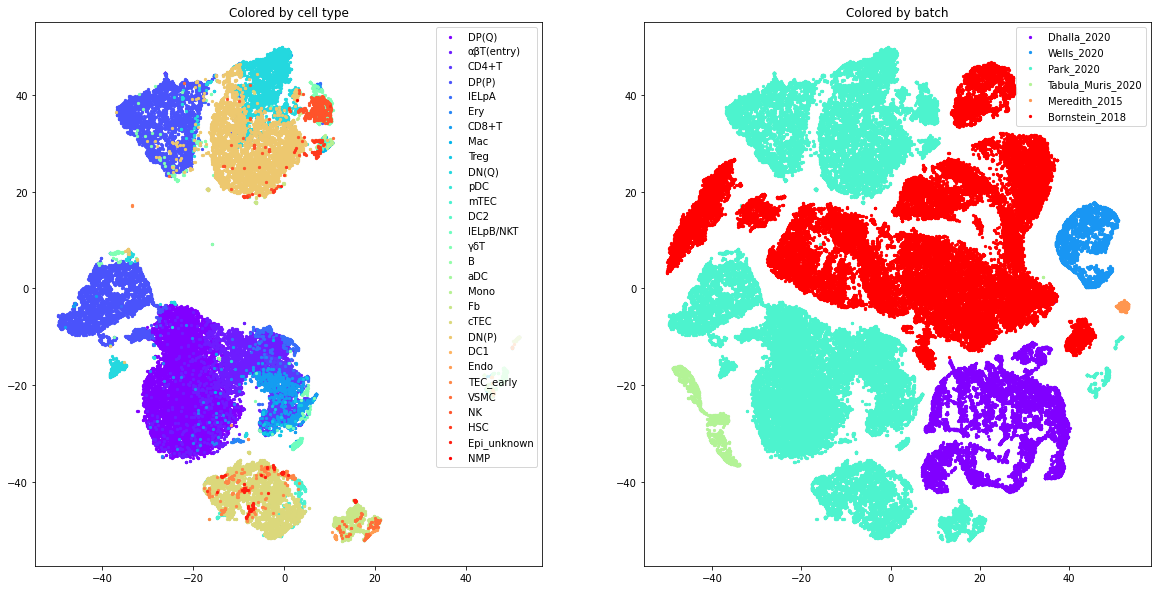

In [42]:
data_pca = PCA(n_components=50).fit_transform(data.T)
data_tsne = TSNE(n_components=2).fit_transform(data_pca)
plot_tsne(data_tsne)

In [38]:
# Remove 80% cell type annotations for testing.
test_meta = metadata.copy()
test_meta['type'][np.random.randint(0, len(metadata), int(len(metadata) * 0.8))] = ''
test_meta

,batch,type
cell 1,Dhalla_2020,NaN
cell 2,Dhalla_2020,
cell 3,Dhalla_2020,NaN
cell 4,Dhalla_2020,NaN
cell 5,Dhalla_2020,
...,...,...
cell 83873,Bornstein_2018,NaN
cell 83874,Bornstein_2018,NaN
cell 83875,Bornstein_2018,NaN
cell 83876,Bornstein_2018,


In [39]:
model = BuildMAT2(
    data=data,
    metadata=test_meta,
    anchor=anchor,
    num_workers=2,
    use_gpu=True,
    mode='semi-supervised')
model.train(epochs=30)

Stage 1: [ 030 / 030 ] 13238.62 sec(s) | ############################## | Train Loss: 0.206750

Stage 2: [ 030 / 030 ] 47003.54 sec(s) | ############################## | Train Loss: 70.307152
Training finish!



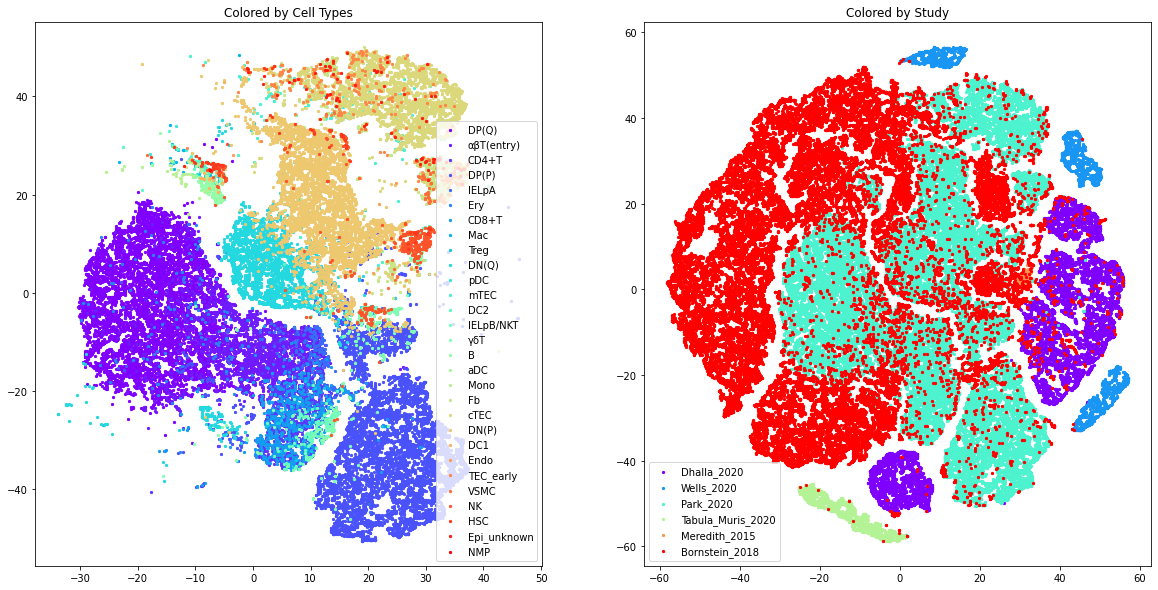

In [40]:
rec = model.evaluate(data)
rec_pca = PCA(n_components=50).fit_transform(rec)
rec_tsne = TSNE(n_components=2).fit_transform(rec_pca)
plot_tsne(rec_tsne)

In [47]:
rec

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00629096],
       [0.        , 0.        , 0.00130331, ..., 0.        , 0.        ,
        0.00401729],
       [0.00389927, 0.00118118, 0.00763583, ..., 0.00761871, 0.0036953 ,
        0.0029336 ],
       ...,
       [0.0126389 , 0.01039116, 0.03739715, ..., 0.        , 0.02879786,
        0.0041983 ],
       [0.01158844, 0.01117606, 0.02674391, ..., 0.01254601, 0.03625121,
        0.00605631],
       [0.        , 0.00342885, 0.00015073, ..., 0.00652802, 0.01369522,
        0.00763826]], dtype=float32)

### Load logcounts data

In [48]:
data2 = pd.read_csv('thymus_mouse_logcounts_corrected.csv', header=0, index_col=0)
data2

,cell 1,cell 2,cell 3,cell 4,cell 5,cell 6,cell 7,cell 8,cell 9,cell 10,...,cell 83868,cell 83869,cell 83870,cell 83871,cell 83872,cell 83873,cell 83874,cell 83875,cell 83876,cell 83877
Xkr4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Mrpl15,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.484266,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Lypla1,0.0,1.020652,0.000000,0.0,0.0,0.0,0.000000,2.266003,0.0,0.000000,...,0.0,0.0,0.925648,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Tcea1,0.0,0.000000,0.909317,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sfxn4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Prdx3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.484266,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Grk5,0.0,0.000000,4.773187,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
Gm7102,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.91094,0.0,0.0,0.0,0.0,0.0,0.0


### Load metadata

In [49]:
metadata2 = pd.read_csv('thymus_mouse_metadata_corrected_colnames.csv', header=0, index_col=0)
metadata2

,batch,type
cell 1,Dhalla_2020,NaN
cell 2,Dhalla_2020,NaN
cell 3,Dhalla_2020,NaN
cell 4,Dhalla_2020,NaN
cell 5,Dhalla_2020,NaN
...,...,...
cell 83873,Bornstein_2018,NaN
cell 83874,Bornstein_2018,NaN
cell 83875,Bornstein_2018,NaN
cell 83876,Bornstein_2018,NaN


### Load anchors

In [50]:
anchor2 = pd.read_csv('mouse_thymus_anchors_corrected_colnames.csv', header=0, index_col=0)
anchor2

,cell1,cell2,score
1,2,11041,0.250000
2,2,11526,0.500000
3,4,11778,0.450000
4,7,9597,0.000000
5,11,9401,0.700000
...,...,...,...
35094,71494,49487,0.563356
35095,53203,49493,0.820205
35096,70067,49497,0.948630
35097,53844,49497,0.777397


### tSNE function

### Plot original data

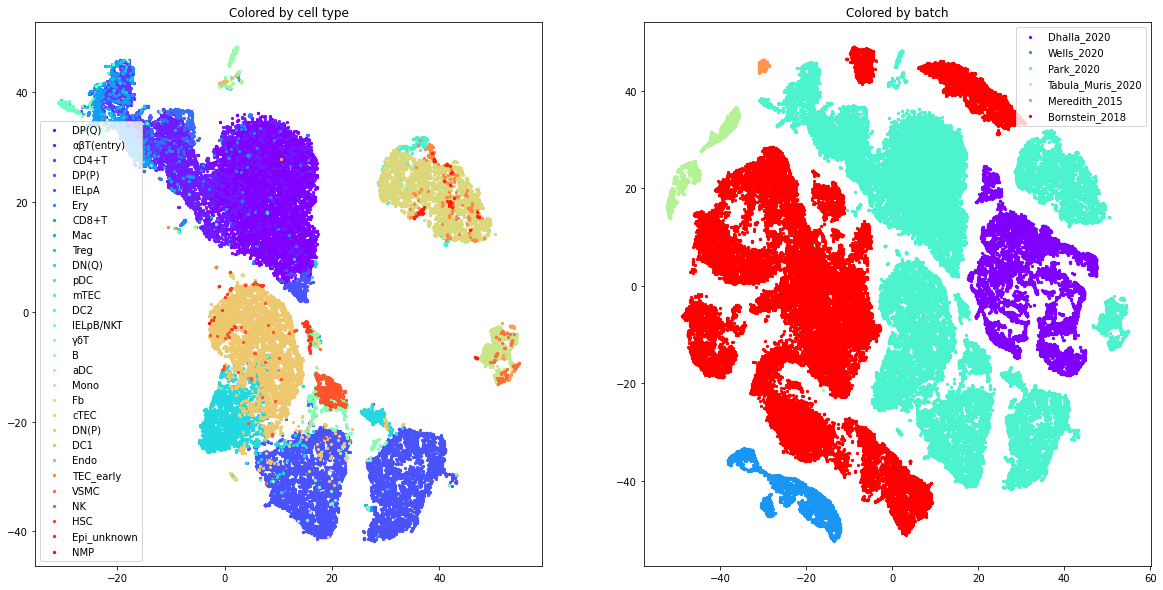

In [51]:
data2_pca = PCA(n_components=50).fit_transform(data2.T)
data2_tsne = TSNE(n_components=2).fit_transform(data2_pca)
plot_tsne(data2_tsne)

In [52]:
# Remove 80% cell type annotations for testing.
test_meta2 = metadata2.copy()
test_meta2['type'][np.random.randint(0, len(metadata2), int(len(metadata2) * 0.8))] = ''
test_meta2

,batch,type
cell 1,Dhalla_2020,
cell 2,Dhalla_2020,
cell 3,Dhalla_2020,
cell 4,Dhalla_2020,
cell 5,Dhalla_2020,NaN
...,...,...
cell 83873,Bornstein_2018,NaN
cell 83874,Bornstein_2018,
cell 83875,Bornstein_2018,NaN
cell 83876,Bornstein_2018,NaN


In [53]:
model2 = BuildMAT2(
    data=data2,
    metadata=test_meta2,
    anchor=anchor2,
    num_workers=2,
    use_gpu=True,
    mode='semi-supervised')
model2.train(epochs=30)

Stage 1: [ 030 / 030 ] 14863.22 sec(s) | ############################## | Train Loss: 0.248483

Stage 2: [ 030 / 030 ] 52107.63 sec(s) | ############################## | Train Loss: 69.600571
Training finish!



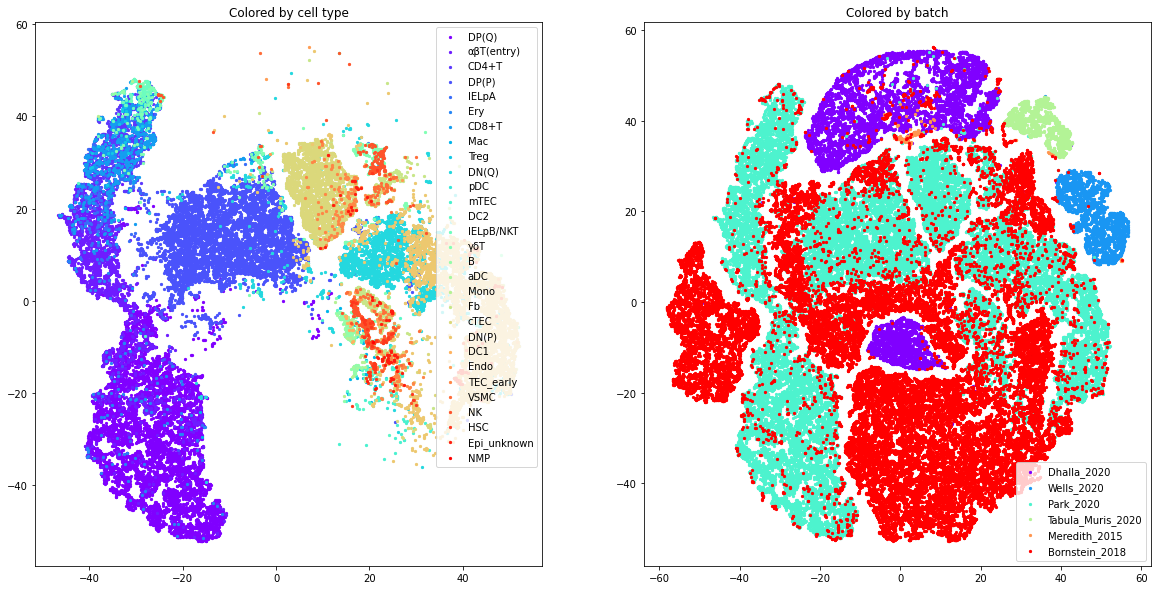

In [55]:
rec2 = model2.evaluate(data2)
rec2_pca = PCA(n_components=50).fit_transform(rec2)
rec2_tsne = TSNE(n_components=2).fit_transform(rec2_pca)
plot_tsne(rec2_tsne)

In [58]:
test_meta2

,batch,type,cluster
cell 1,Dhalla_2020,,Dhalla_2020
cell 2,Dhalla_2020,,Dhalla_2020
cell 3,Dhalla_2020,,Dhalla_2020
cell 4,Dhalla_2020,,Dhalla_2020
cell 5,Dhalla_2020,NaN,Dhalla_2020
...,...,...,...
cell 83873,Bornstein_2018,NaN,Bornstein_2018
cell 83874,Bornstein_2018,,Bornstein_2018
cell 83875,Bornstein_2018,NaN,Bornstein_2018
cell 83876,Bornstein_2018,NaN,Bornstein_2018
